In [164]:
import json 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib

In [101]:
def nthHarmonic(N,s) :

    harmonic = 1.00
    for i in range(2, N + 1) :
        harmonic += 1 / i**s

    return harmonic

def zipf_rvgen(low, high, N, size, a=6.) :
    choices = np.array(range(low, high+1))
    probs = choices**(-a) / nthHarmonic(N,a)
    return np.random.choice(choices,p=np.array(probs)/sum(probs),size=size)

def bino_gen(mu, length, size) :
    rst = [list(np.random.binomial(1, mu, length)).count(1) for i in range(size)]
    return rst

In [102]:
## import data 
dim = 3
level = 0

with open("../data/dim/"+str(dim)+"/level"+str(level)+"_levy_generation.json", "r") as jsonfile :
        generations = json.load(jsonfile)
        jsonfile.close()

with open("../data/dim/"+str(dim)+"/level"+str(level)+"_levy_data.json", "r")as jsonfile :
        data_all = json.load(jsonfile)
        jsonfile.close()

with open("../data/dim/"+str(dim)+"/level"+str(level)+"_levy_fitness.json", "r")as jsonfile :
    fitnesses = json.load(jsonfile)
    jsonfile.close()
mut_params = sorted(np.array(list(data_all.keys()), dtype=float))

In [103]:
gen_df = pd.DataFrame(generations)
gen_df 

,2.6,0.8,0.2,6.4,4.0,5.0,1.2,1.8,3.6,1.6,...,1.4,5.6,5.2,5.8,3.4,1.0,2.4,4.8,4.2,6.6
0,14,11,8,42,29,15,15,212,277,49,...,18,25,1000,26,24,15,375,18,12,28
1,9,14,7,359,81,1000,162,282,427,16,...,16,99,25,29,14,29,48,36,376,307
2,360,9,16,1000,54,98,71,9,18,94,...,11,1000,41,17,15,12,12,16,135,47
3,644,19,10,1000,23,26,23,67,21,19,...,16,14,22,1000,15,9,17,179,81,19
4,16,13,9,877,1000,59,128,20,1000,33,...,22,17,56,21,1000,12,194,491,1000,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,27,11,10,926,24,1000,23,21,11,16,...,17,16,58,1000,40,19,147,28,745,790
146,308,16,13,600,18,878,18,18,26,47,...,11,263,32,346,44,18,62,616,18,128
147,10,8,17,1000,971,1000,19,16,16,6,...,16,1000,24,1000,16,18,23,11,777,265
148,16,22,13,18,55,987,103,14,1000,17,...,12,652,337,30,21,17,25,1000,176,27


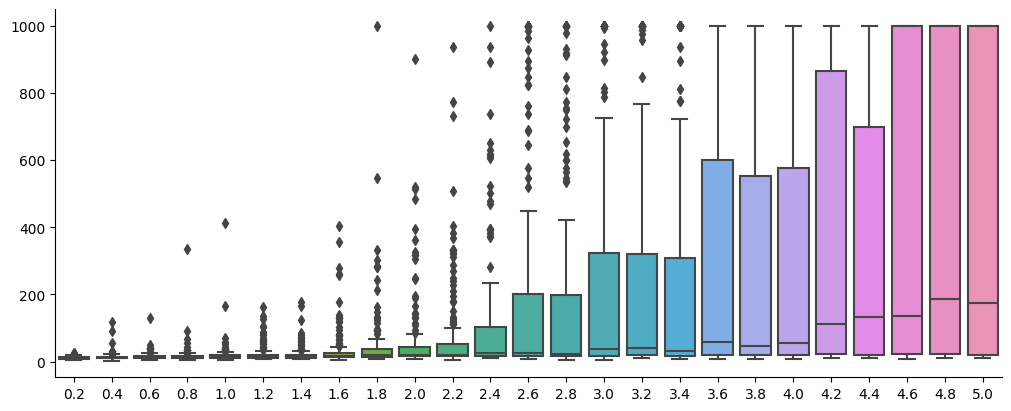

In [104]:
figure = plt.figure(constrained_layout=True, figsize=(10,4))
gs = figure.add_gridspec(nrows=1, ncols=1, left=0.05, right=0.48, wspace=0.05)
ax = figure.add_subplot(gs[0,0])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
sns.boxplot([gen_df[str(c)] for c in mut_params[:25]])
plt.xticks(range(len(mut_params[:25])), mut_params[:25])
plt.show()

In [105]:
min_move = [min(data_all[str(c)]) for c in mut_params]
min_counts = [data_all[str(c)].count(min(data_all[str(c)])) for c in mut_params]

In [106]:
min_move, min_counts

([6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6],
 [8,
  1,
  7,
  8,
  3,
  2,
  7,
  6,
  14,
  8,
  10,
  11,
  9,
  9,
  14,
  7,
  19,
  13,
  16,
  14,
  10,
  14,
  10,
  12,
  13,
  14,
  11,
  15,
  10,
  16,
  15,
  19,
  14,
  5,
  17])

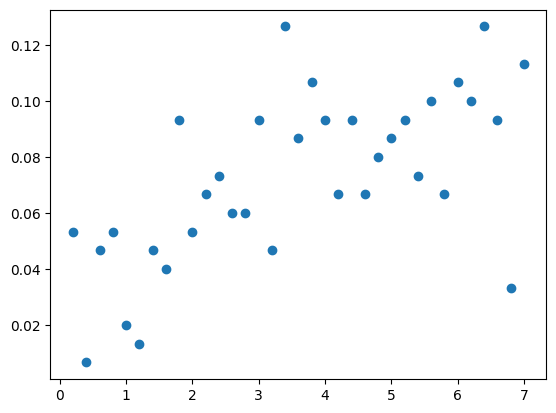

In [107]:
plt.plot(mut_params, np.array(min_counts, dtype=float)/150, 'o') 
plt.show()

<BarContainer object of 35 artists>

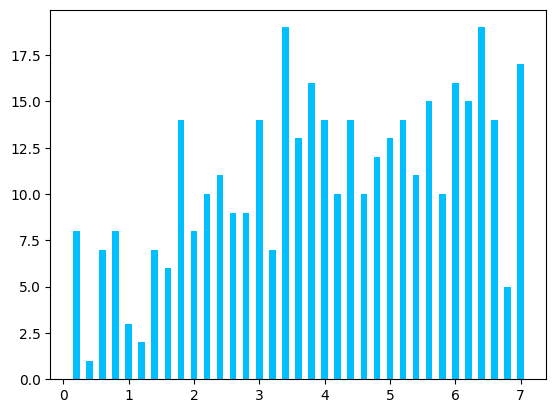

In [108]:
plt.bar(mut_params, min_counts, width=0.1, color='deepskyblue', align='center')

In [109]:
success_rate = [fitnesses[str(key)].count(1)/len(fitnesses[str(key)]) for key in mut_params]

In [110]:
success_rate

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9933333333333333,
 1.0,
 1.0,
 0.9933333333333333,
 0.9666666666666667,
 0.9533333333333334,
 0.9066666666666666,
 0.9066666666666666,
 0.9,
 0.8333333333333334,
 0.8333333333333334,
 0.8266666666666667,
 0.7733333333333333,
 0.7933333333333333,
 0.74,
 0.7333333333333333,
 0.7333333333333333,
 0.6933333333333334,
 0.7066666666666667,
 0.6266666666666667,
 0.7133333333333334,
 0.6933333333333334,
 0.7333333333333333,
 0.5733333333333334,
 0.7266666666666667,
 0.6866666666666666,
 0.6066666666666667]

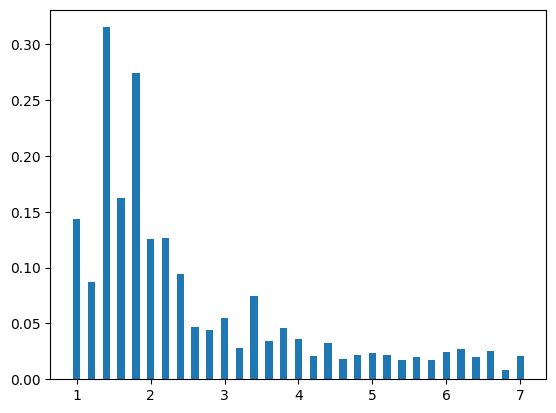

In [111]:
gen_data = np.array([np.mean(gen_df[str(c)]) for c in mut_params])
ratio = (np.array(min_counts, dtype=float)* np.array(success_rate))/gen_data
plt.bar(mut_params[4:], ratio[4:], width=0.1, align="center") 
plt.show()

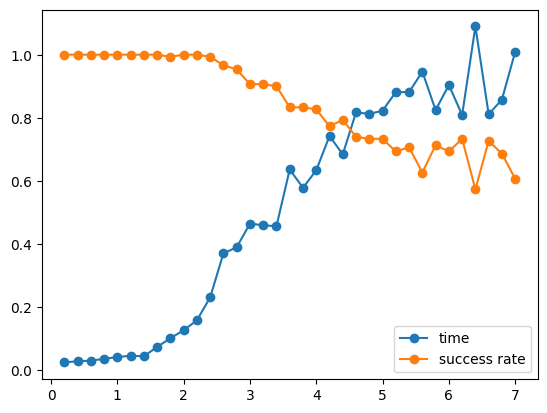

In [112]:
plt.plot(mut_params, gen_data/500, 'o-', label='time')
plt.plot(mut_params, success_rate, 'o-', label="success rate")
plt.legend()
plt.show()

In [113]:
min_counts

[8,
 1,
 7,
 8,
 3,
 2,
 7,
 6,
 14,
 8,
 10,
 11,
 9,
 9,
 14,
 7,
 19,
 13,
 16,
 14,
 10,
 14,
 10,
 12,
 13,
 14,
 11,
 15,
 10,
 16,
 15,
 19,
 14,
 5,
 17]

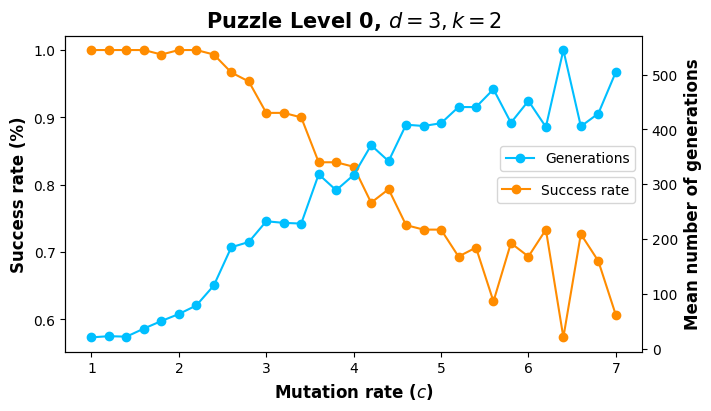

In [114]:
figure = plt.figure(constrained_layout=True, figsize=(7,4))
gs = figure.add_gridspec(nrows=1, ncols=1, left=0.05, right=0.48, wspace=0.05)
ax = figure.add_subplot(gs[0,0])
ax.spines["right"].set_visible(False)
#ax.spines["top"].set_visible(False)
plt.plot(mut_params[4:], success_rate[4:] , "o-", color="darkorange", label="Success rate")
plt.ylabel(r"Success rate (%)", weight="bold", fontsize=12)
plt.xlabel(r"Mutation rate ($c$)", weight="bold", fontsize=12)
plt.legend(loc='lower right',bbox_to_anchor=(1, 0.45))

ax3 = ax.twinx()
#ax3.spines["top"].set_visible(False)
ax3.set_ylabel(r'Mean number of generations',fontsize=12,weight="bold")
ax3.plot(mut_params[4:],[np.mean(generations[str(k)]) for k in mut_params][4:],"o-", color='deepskyblue', label="Generations")
plt.legend(loc='lower right',bbox_to_anchor=(1, 0.55))
plt.title("Puzzle Level "+str(level)+", $d=3, k=2$", fontsize=15,weight="bold")
plt.savefig("../images/mu_success_rate_dim3_level" +str(level)+".pdf")
plt.show()

In [115]:
N = 10000
zipf_dist = list(zipf_rvgen(1,70, 70, N, 1.4))
barplot_data = []

for i in set(zipf_dist) :
    barplot_data +=[[i,zipf_dist.count(i)]]

barplot_data = np.array(barplot_data)
p = barplot_data[:,1]/sum(barplot_data[:,1])
mean_zipf = sum(p*barplot_data[:,0])
print(f"The mean of the Zipf's distribution is {mean_zipf}")
print(mean_zipf/4)
mu = 0.25 #mean_zipf/args.length
print(f"The Binomial mutation rate is {mu}")
bino_dist = bino_gen(mu, 70, N)

The mean of the Zipf's distribution is 7.594499999999997
1.8986249999999993
The Binomial mutation rate is 0.25


In [116]:
barplot_data_bino = []
for i in set(bino_dist) :
    barplot_data_bino +=[[i,bino_dist.count(i)]]

barplot_data_bino = np.array(barplot_data_bino)

[12, 12, 8, 13, 15, 11, 6, 9, 7, 7, 7, 9, 13, 7, 8, 9, 8, 11, 12, 9, 8, 10, 12, 9, 9, 10, 9, 12, 8, 9, 6, 13, 15, 14, 9, 12, 12, 7, 8, 7, 9, 10, 9, 9, 7, 7, 10, 8, 8, 10, 11, 7, 11, 7, 9, 10, 11, 11, 9, 8, 9, 7, 11, 10, 10, 13, 12, 9, 8, 6, 11, 12, 10, 7, 10, 10, 14, 10, 9, 7, 6, 10, 11, 12, 10, 10, 10, 6, 8, 12, 10, 6, 15, 11, 11, 6, 8, 8, 8, 10, 6, 10, 8, 7, 13, 10, 12, 8, 12, 6, 9, 7, 11, 13, 8, 7, 15, 8, 10, 10, 7, 8, 9, 9, 9, 11, 11, 8, 7, 17, 11, 7, 11, 6, 15, 8, 9, 6, 9, 6, 7, 6, 10, 11, 8, 8, 8, 8, 6] {6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17} 149


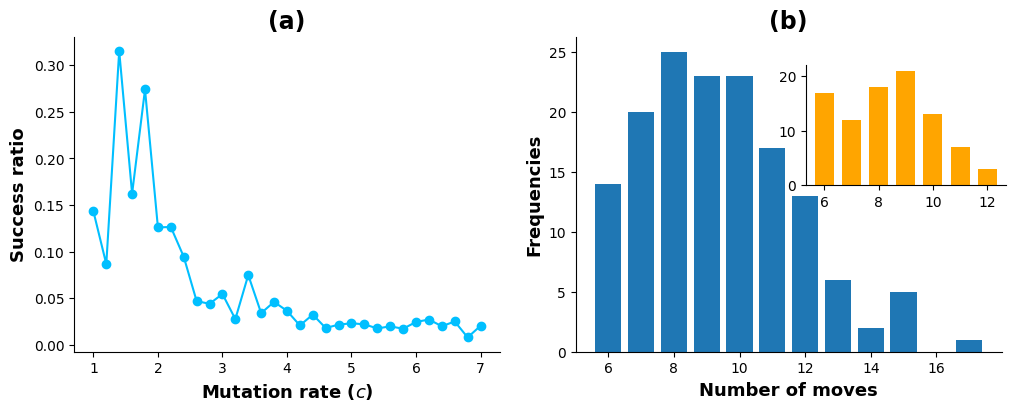

In [150]:
figure = plt.figure(constrained_layout=True, figsize=(10,4))
gs = figure.add_gridspec(nrows=1, ncols=2, left=0.05, right=0.48, wspace=0.05)
ax = figure.add_subplot(gs[0,0])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.title("(a)", fontsize=17,weight="bold")
ratio = (np.array(min_counts, dtype=float)* np.array(success_rate))/gen_data
ax.plot(mut_params[4:], ratio[4:], "o-", color="deepskyblue") 
#ax.bar(mut_params[4:], ratio[4:], width=0.1, align="center", color="deepskyblue") 
plt.ylabel("Success ratio", fontsize=13, weight='bold')
plt.xlabel(r"Mutation rate ($c$)", weight="bold", fontsize=13)

ax = figure.add_subplot(gs[0,1])
# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)
# plt.xlabel("Point mutations", fontsize=10, weight='bold')
# plt.ylabel("Frequency", fontsize=10, weight='bold')
# plt.bar(barplot_data_bino[:,0], barplot_data_bino[:,1], width=.8, align='center', log=True, label=r"Binomial with $\mu*="+str(np.round(mu,3))+"$", color="darkorange")
# plt.bar(barplot_data[:,0], barplot_data[:,1], width=.4, align='center', log=True, label=r"Zipf with $c*="+str(1.4)+"$", alpha=0.5, color="deepskyblue")
# plt.legend()
histo_data = data_all["1.8"]
print(histo_data, set(histo_data), len(histo_data))
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xlabel(r"Number of moves", weight='bold', fontsize=13)
ax.set_ylabel(r"Frequencies", weight="bold", fontsize=13)
ax.bar(list(set(histo_data)), [histo_data.count(s) for s in list(set(histo_data))],  width=.8, align='center')
plt.title("(b)", fontsize=17,weight="bold")
# plt.title("Puzzle Level "+str(level), fontsize=17,weight="bold")
ax2 = plt.axes([0.8, 0.55, 0.20, 0.3])
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
histo_data = np.array(histo_data_7)
plot_data = histo_data[histo_data<25].tolist()
ax2.bar(list(set(plot_data)), [plot_data.count(s) for s in sorted(set(plot_data))],  width=.7, align='center', color="orange")
# plt.savefig("../images/best_cvalue"+str(dim)+"_level" +str(level)+"number_of_move.pdf")
plt.savefig("../images/best_cvalue"+str(dim)+"_level" +str(level)+".pdf")
plt.savefig("../images/best_cvalue"+str(dim)+"_level" +str(level)+".svg")
plt.show()

[7, 9, 7, 10, 10, 8, 8, 6, 8, 10, 10, 8, 11, 10, 11, 8, 9, 8, 6, 6, 9, 8, 11, 7, 9, 9, 6, 8, 7, 7, 6, 9, 9, 6, 7, 12, 11, 10, 10, 9, 6, 10, 9, 6, 10, 9, 9, 6, 8, 9, 11, 7, 12, 9, 6, 9, 10, 8, 8, 7, 9, 9, 10, 9, 11, 8, 12, 7, 9, 8, 6, 7, 7, 6, 6, 8, 9, 6, 6, 9, 6, 10, 9, 8, 11, 8, 8, 10, 8, 7, 6] {6, 7, 8, 9, 10, 11, 12} 91


<BarContainer object of 7 artists>

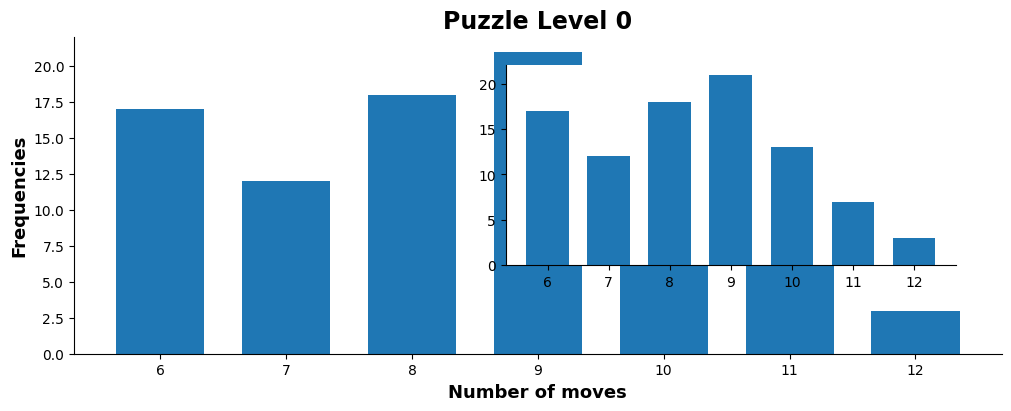

In [151]:
histo_data_7 = data_all["7.0"]
print(histo_data_7, set(histo_data_7), len(histo_data_7))
figure = plt.figure(constrained_layout=True, figsize=(10,4))
gs = figure.add_gridspec(nrows=1, ncols=1, left=0.05, right=0.48, wspace=0.05)
ax = figure.add_subplot(gs[0,0])
#ax.set_yscale("log")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xlabel(r"Number of moves", weight='bold', fontsize=13)
ax.set_ylabel(r"Frequencies", weight="bold", fontsize=13)
ax.bar(list(set(histo_data_7)), [histo_data_7.count(s) for s in list(set(histo_data_7))],  width=.7, align='center')
plt.title("Puzzle Level "+str(level), fontsize=17,weight="bold")
ax2 = plt.axes([0.5, 0.35, 0.45, 0.5])
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
histo_data = np.array(histo_data_7)
plot_data = histo_data[histo_data<25].tolist()
ax2.bar(list(set(plot_data)), [plot_data.count(s) for s in sorted(set(plot_data))],  width=.7, align='center')


[12, 12, 8, 13, 15, 11, 6, 9, 7, 7, 7, 9, 13, 7, 8, 9, 8, 11, 12, 9, 8, 10, 12, 9, 9, 10, 9, 12, 8, 9, 6, 13, 15, 14, 9, 12, 12, 7, 8, 7, 9, 10, 9, 9, 7, 7, 10, 8, 8, 10, 11, 7, 11, 7, 9, 10, 11, 11, 9, 8, 9, 7, 11, 10, 10, 13, 12, 9, 8, 6, 11, 12, 10, 7, 10, 10, 14, 10, 9, 7, 6, 10, 11, 12, 10, 10, 10, 6, 8, 12, 10, 6, 15, 11, 11, 6, 8, 8, 8, 10, 6, 10, 8, 7, 13, 10, 12, 8, 12, 6, 9, 7, 11, 13, 8, 7, 15, 8, 10, 10, 7, 8, 9, 9, 9, 11, 11, 8, 7, 17, 11, 7, 11, 6, 15, 8, 9, 6, 9, 6, 7, 6, 10, 11, 8, 8, 8, 8, 6] {6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17} 149


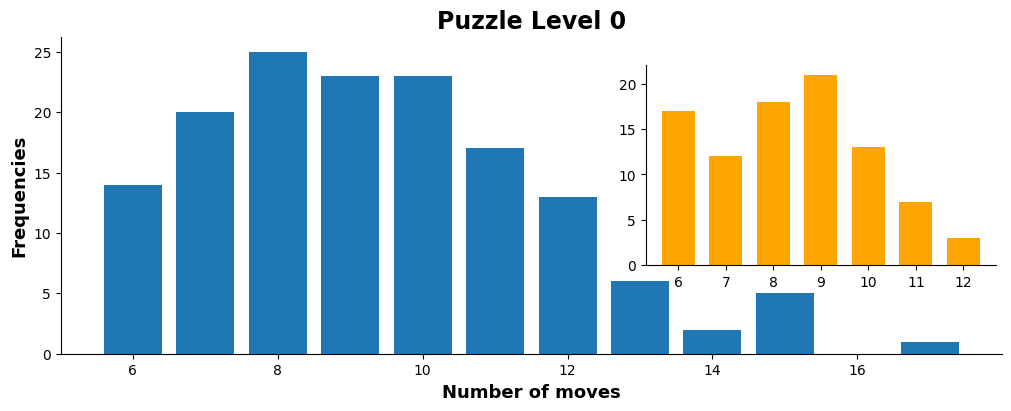

In [158]:
histo_data = data_all["1.8"]
print(histo_data, set(histo_data), len(histo_data))
figure = plt.figure(constrained_layout=True, figsize=(10,4))
gs = figure.add_gridspec(nrows=1, ncols=1, left=0.05, right=0.48, wspace=0.05)
ax = figure.add_subplot(gs[0,0])
#ax.set_yscale("log")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xlabel(r"Number of moves", weight='bold', fontsize=13)
ax.set_ylabel(r"Frequencies", weight="bold", fontsize=13)
ax.bar(list(set(histo_data)), [histo_data.count(s) for s in list(set(histo_data))],  width=.8, align='center')
plt.title("Puzzle Level "+str(level), fontsize=17,weight="bold")
ax2 = plt.axes([0.64, 0.35, 0.35, 0.5])
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
histo_data = np.array(histo_data_7)
plot_data = histo_data[histo_data<25].tolist()
ax2.bar(list(set(plot_data)), [plot_data.count(s) for s in sorted(set(plot_data))],  width=.7, align='center', color="orange")
plt.savefig("../images/best_cvalue"+str(dim)+"_level" +str(level)+"number_of_move.pdf")

In [135]:
histo_data = data_all["7.0"]
histo_data.count(6)

17

In [136]:
histo_data = data_all["7.0"]
[histo_data.count(mm) for mm in [6,7,8]]

[17, 12, 18]

In [137]:
histo_data = data_all["1.8"]
[histo_data.count(mm) for mm in [6,7,8]]

[14, 20, 25]

In [138]:
histo_data = data_all["5.0"]
[histo_data.count(mm) for mm in [6,7,8]]

[13, 20, 25]

In [139]:
number_of_levels = 3
dim = 3 

all_level_data = []
for i in range(number_of_levels):
    with open("../data/dim/"+str(dim)+"/level"+str(i)+"_levy_data.json", "r")as jsonfile :
        all_level_data  += [json.load(jsonfile)]
        jsonfile.close()

9.0 {6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17}
12.0 {7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}
16.0 {10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 25, 27}


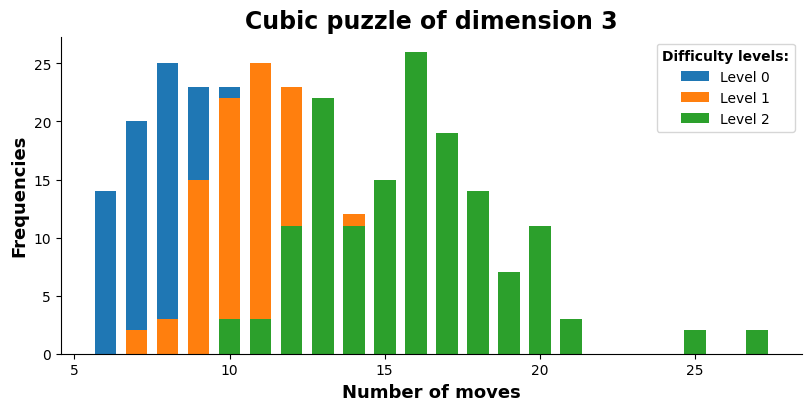

In [162]:
figure = plt.figure(constrained_layout=True, figsize=(8,4))
gs = figure.add_gridspec(nrows=1, ncols=1, left=0.05, right=0.48, wspace=0.05)
ax = figure.add_subplot(gs[0,0])

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xlabel(r"Number of moves", weight='bold', fontsize=13)
ax.set_ylabel(r"Frequencies", weight="bold", fontsize=13)
plt.title("Cubic puzzle of dimension "+str(dim), fontsize=17,weight="bold")

#ax2 = plt.axes([0.4, 0.35, 0.45, 0.5])
#ax2.spines["right"].set_visible(False)
#ax2.spines["top"].set_visible(False)
title_fontproperties = matplotlib.font_manager.FontProperties(weight="bold")
best_mu = "1.8"
colors = ['blue', 'orange', 'green', 'red']
for i in range(number_of_levels) :
    histo_data = all_level_data[i][best_mu]
    print(np.median(histo_data), set(histo_data))
    bar = ax.bar(list(set(histo_data)), [histo_data.count(s) for s in list(set(histo_data))],  width=.7, align='center')
    bar.set_label("Level "+str(i))
    #ax2.bar(sorted(set(histo_data))[:13], [histo_data.count(s) for s in sorted(set(histo_data))[:13]],  width=.7, align='center')

ax.legend(title="Difficulty levels:", title_fontproperties=title_fontproperties)
plt.savefig("../images/mu_"+best_mu+"prime_histo_dim_"+str(dim)+"_alllevels.pdf")
plt.show()

In [133]:
number_of_levels = 4
dim = 4

all_level_data = []
for i in range(number_of_levels):
    with open("../data/dim/"+str(dim)+"/level"+str(i)+"_levy_data.json", "r")as jsonfile :
        all_level_data  += [json.load(jsonfile)]
        jsonfile.close()

[15, 13, 32, 27, 47, 13] {32, 13, 47, 15, 27}
[103, 39, 14, 21] {21, 39, 14, 103}
[51, 386, 178] {178, 386, 51}
[108, 170, 424, 483, 156] {483, 424, 170, 108, 156}


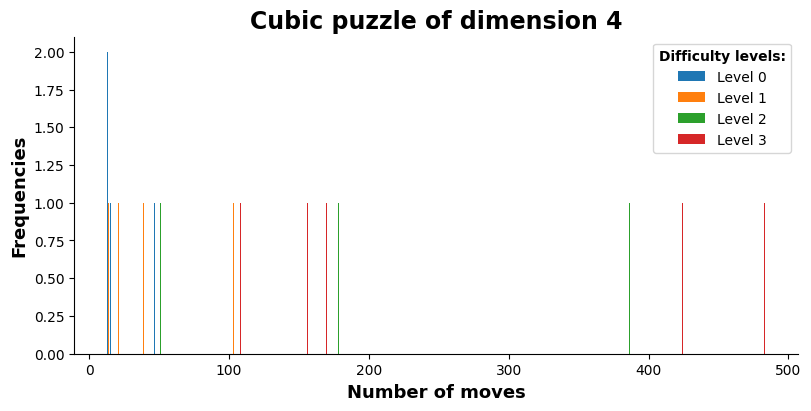

In [134]:
figure = plt.figure(constrained_layout=True, figsize=(8,4))
gs = figure.add_gridspec(nrows=1, ncols=1, left=0.05, right=0.48, wspace=0.05)
ax = figure.add_subplot(gs[0,0])

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xlabel(r"Number of moves", weight='bold', fontsize=13)
ax.set_ylabel(r"Frequencies", weight="bold", fontsize=13)
plt.title("Cubic puzzle of dimension "+str(dim), fontsize=17,weight="bold")

#ax2 = plt.axes([0.4, 0.35, 0.45, 0.5])
#ax2.spines["right"].set_visible(False)
#ax2.spines["top"].set_visible(False)
title_fontproperties = matplotlib.font_manager.FontProperties(weight="bold")
best_mu = "1.0"
colors = ['blue', 'orange', 'green', 'red']
for i in range(number_of_levels) :
    histo_data = all_level_data[i][best_mu]
    print(histo_data, set(histo_data))
    bar = ax.bar(list(set(histo_data)), [histo_data.count(s) for s in list(set(histo_data))],  width=.7, align='center')
    bar.set_label("Level "+str(i))
    #ax2.bar(sorted(set(histo_data))[:13], [histo_data.count(s) for s in sorted(set(histo_data))[:13]],  width=.7, align='center')

ax.legend(title="Difficulty levels:", title_fontproperties=title_fontproperties)
#plt.savefig("../images/mu_"+best_mu+"prime_histo_dim_"+str(dim)+"_alllevels.pdf")
plt.show()

In [161]:
print(f"{}{2}".format(2,2))

22


# A^* Search analyis

In [168]:
d = 3 
k = 2 
l = 4 
level = 1 
njob = 200
log_folder = "../data/as/dim/"+str(d)+"/k/"+str(k)+"/level"+str(level)+"/"
as_df = pd.read_csv(log_folder+"as_solutions"+str(njob)+".csv")

In [169]:
as_df

,Unnamed: 0,d,k,l,level,Min,Moves
0,0,3,2,4,1,7,"[(2.0, 'blue'), (3.0, 'red'), (0.0, 'purple'),..."
1,1,3,2,4,1,7,"[(2.0, 'blue'), (3.0, 'red'), (0.0, 'purple'),..."
2,2,3,2,4,1,7,"[(2.0, 'blue'), (3.0, 'red'), (0.0, 'purple'),..."
3,3,3,2,4,1,7,"[(2.0, 'blue'), (3.0, 'red'), (0.0, 'purple'),..."
4,4,3,2,4,1,7,"[(2.0, 'blue'), (3.0, 'red'), (0.0, 'purple'),..."
...,...,...,...,...,...,...,...
195,195,3,2,4,1,7,"[(2.0, 'blue'), (3.0, 'red'), (0.0, 'purple'),..."
196,196,3,2,4,1,7,"[(2.0, 'blue'), (3.0, 'red'), (0.0, 'purple'),..."
197,197,3,2,4,1,7,"[(2.0, 'blue'), (3.0, 'red'), (0.0, 'purple'),..."
198,198,3,2,4,1,7,"[(2.0, 'blue'), (3.0, 'red'), (0.0, 'purple'),..."


In [172]:
set(as_df['Min'].values)

{7}